In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import ml_metrics as metrics

In [2]:
#load datasets
train_10k = pd.read_csv('train_downsampled_10k.csv')
train_11k = pd.read_csv('train_downsampled_11k.csv')
train_12k = pd.read_csv('train_downsampled_12k.csv')
train_13k = pd.read_csv('train_downsampled_13k.csv')
train_14k = pd.read_csv('train_downsampled_14k.csv')
train_15k = pd.read_csv('train_downsampled_15k.csv')

In [3]:
# Drop unnecessary features
train_10k = train_10k.drop(['date_time'], axis=1)
train_10k = train_10k.drop(['srch_ci'], axis=1)
train_10k = train_10k.drop(['srch_co'], axis=1)

train_11k = train_11k.drop(['date_time'], axis=1)
train_11k = train_11k.drop(['srch_ci'], axis=1)
train_11k = train_11k.drop(['srch_co'], axis=1)

train_12k = train_12k.drop(['date_time'], axis=1)
train_12k = train_12k.drop(['srch_ci'], axis=1)
train_12k = train_12k.drop(['srch_co'], axis=1)

train_13k = train_13k.drop(['date_time'], axis=1)
train_13k = train_13k.drop(['srch_ci'], axis=1)
train_13k = train_13k.drop(['srch_co'], axis=1)

train_14k = train_14k.drop(['date_time'], axis=1)
train_14k = train_14k.drop(['srch_ci'], axis=1)
train_14k = train_14k.drop(['srch_co'], axis=1)

train_15k = train_15k.drop(['date_time'], axis=1)
train_15k = train_15k.drop(['srch_ci'], axis=1)
train_15k = train_15k.drop(['srch_co'], axis=1)

In [4]:
#Split the data
train_new_10k = train_10k[((train_10k.year == 2013) | ((train_10k.year == 2014) & (train_10k.month < 8)))]
test_new_10k = train_10k[((train_10k.year == 2014) & (train_10k.month >= 8))]
train_new_11k = train_11k[((train_11k.year == 2013) | ((train_11k.year == 2014) & (train_11k.month < 8)))]
test_new_11k = train_11k[((train_11k.year == 2014) & (train_11k.month >= 8))]
train_new_12k = train_12k[((train_12k.year == 2013) | ((train_12k.year == 2014) & (train_12k.month < 8)))]
test_new_12k = train_12k[((train_12k.year == 2014) & (train_12k.month >= 8))]
train_new_13k = train_13k[((train_13k.year == 2013) | ((train_13k.year == 2014) & (train_13k.month < 8)))]
test_new_13k = train_13k[((train_13k.year == 2014) & (train_13k.month >= 8))]
train_new_14k = train_14k[((train_14k.year == 2013) | ((train_14k.year == 2014) & (train_14k.month < 8)))]
test_new_14k = train_14k[((train_14k.year == 2014) & (train_14k.month >= 8))]
train_new_15k = train_15k[((train_15k.year == 2013) | ((train_15k.year == 2014) & (train_15k.month < 8)))]
test_new_15k = train_15k[((train_11k.year == 2014) & (train_15k.month >= 8))]

In [5]:
test_new_10k = test_new_10k[test_new_10k.is_booking == 1]
test_new_11k = test_new_11k[test_new_11k.is_booking == 1]
test_new_12k = test_new_12k[test_new_12k.is_booking == 1]
test_new_13k = test_new_13k[test_new_13k.is_booking == 1]
test_new_14k = test_new_14k[test_new_14k.is_booking == 1]
test_new_15k = test_new_15k[test_new_15k.is_booking == 1]

In [6]:
X_train_new_10k = train_new_10k.drop(['hotel_cluster'], axis=1)
Y_train_new_10k = train_new_10k['hotel_cluster']
X_train_new_11k = train_new_11k.drop(['hotel_cluster'], axis=1)
Y_train_new_11k = train_new_11k['hotel_cluster']
X_train_new_12k = train_new_12k.drop(['hotel_cluster'], axis=1)
Y_train_new_12k = train_new_12k['hotel_cluster']
X_train_new_13k = train_new_13k.drop(['hotel_cluster'], axis=1)
Y_train_new_13k = train_new_13k['hotel_cluster']
X_train_new_14k = train_new_14k.drop(['hotel_cluster'], axis=1)
Y_train_new_14k = train_new_14k['hotel_cluster']
X_train_new_15k = train_new_15k.drop(['hotel_cluster'], axis=1)
Y_train_new_15k = train_new_15k['hotel_cluster']

In [7]:
def mean_average_precision(y_test, y_pred_proba):
    y_pred_k = np.array([y_pred_proba[i].argsort()[-5:][::-1] 
        for i in range(len(y_test))]) # k=5 most likely predicted classes for each input
    map_score = metrics.mapk(y_test.values[np.newaxis].T, y_pred_k, 5)
    return map_score

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_10k = KNeighborsClassifier()
knn_11k = KNeighborsClassifier()
knn_12k = KNeighborsClassifier()
knn_13k = KNeighborsClassifier()
knn_14k = KNeighborsClassifier()
knn_15k = KNeighborsClassifier()

In [9]:
knn_10k.fit(X_train_new_10k, Y_train_new_10k)
knn_11k.fit(X_train_new_11k, Y_train_new_11k)
knn_12k.fit(X_train_new_12k, Y_train_new_12k)
knn_13k.fit(X_train_new_13k, Y_train_new_13k)
knn_14k.fit(X_train_new_14k, Y_train_new_14k)
knn_15k.fit(X_train_new_15k, Y_train_new_15k)

KNeighborsClassifier()

In [10]:
X_test_new_10k = test_new_10k.drop(['hotel_cluster'], axis=1)
Y_test_new_10k = test_new_10k['hotel_cluster']
X_test_new_11k = test_new_11k.drop(['hotel_cluster'], axis=1)
Y_test_new_11k = test_new_11k['hotel_cluster']
X_test_new_12k = test_new_12k.drop(['hotel_cluster'], axis=1)
Y_test_new_12k = test_new_12k['hotel_cluster']
X_test_new_13k = test_new_13k.drop(['hotel_cluster'], axis=1)
Y_test_new_13k = test_new_13k['hotel_cluster']
X_test_new_14k = test_new_14k.drop(['hotel_cluster'], axis=1)
Y_test_new_14k = test_new_14k['hotel_cluster']
X_test_new_15k = test_new_15k.drop(['hotel_cluster'], axis=1)
Y_test_new_15k = test_new_15k['hotel_cluster']

In [12]:
Y_test_pred_10k = knn_10k.predict(X_test_new_10k)
Y_test_pred_proba_10k = knn_10k.predict_proba(X_test_new_10k)
Y_test_pred_11k = knn_11k.predict(X_test_new_11k)
Y_test_pred_proba_11k = knn_11k.predict_proba(X_test_new_11k)
Y_test_pred_12k = knn_12k.predict(X_test_new_12k)
Y_test_pred_proba_12k = knn_12k.predict_proba(X_test_new_12k)
Y_test_pred_13k = knn_13k.predict(X_test_new_13k)
Y_test_pred_proba_13k = knn_13k.predict_proba(X_test_new_13k)
Y_test_pred_14k = knn_14k.predict(X_test_new_14k)
Y_test_pred_proba_14k = knn_14k.predict_proba(X_test_new_14k)
Y_test_pred_15k = knn_15k.predict(X_test_new_15k)
Y_test_pred_proba_15k = knn_15k.predict_proba(X_test_new_15k)

In [13]:
print(Y_test_pred_proba_10k)

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.2 0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [14]:
accuracy_10k = accuracy_score(Y_test_new_10k, Y_test_pred_10k)
print('Accuracy', accuracy_10k)
accuracy_11k = accuracy_score(Y_test_new_11k, Y_test_pred_11k)
print('Accuracy', accuracy_11k)
accuracy_12k = accuracy_score(Y_test_new_12k, Y_test_pred_12k)
print('Accuracy', accuracy_12k)
accuracy_13k = accuracy_score(Y_test_new_13k, Y_test_pred_13k)
print('Accuracy', accuracy_13k)
accuracy_14k = accuracy_score(Y_test_new_14k, Y_test_pred_14k)
print('Accuracy', accuracy_14k)
accuracy_15k = accuracy_score(Y_test_new_15k, Y_test_pred_15k)
print('Accuracy', accuracy_15k)

Accuracy 0.03802672147995889
Accuracy 0.04035816247080197
Accuracy 0.04406615960400821
Accuracy 0.040280210157618214
Accuracy 0.03800840077860875
Accuracy 0.27562344953649304


In [15]:
map_10k = mean_average_precision(Y_test_new_10k, Y_test_pred_proba_10k)
print("Mean Average Precision@5", map_10k)
map_11k = mean_average_precision(Y_test_new_11k, Y_test_pred_proba_11k)
print("Mean Average Precision@5", map_11k)
map_12k = mean_average_precision(Y_test_new_12k, Y_test_pred_proba_12k)
print("Mean Average Precision@5", map_12k)
map_13k = mean_average_precision(Y_test_new_13k, Y_test_pred_proba_13k)
print("Mean Average Precision@5", map_13k)
map_14k = mean_average_precision(Y_test_new_14k, Y_test_pred_proba_14k)
print("Mean Average Precision@5", map_14k)
map_15k = mean_average_precision(Y_test_new_15k, Y_test_pred_proba_15k)
print("Mean Average Precision@5", map_15k)

Mean Average Precision@5 0.06939509616796359
Mean Average Precision@5 0.07372393805692534
Mean Average Precision@5 0.07729486096019961
Mean Average Precision@5 0.07387441622883831
Mean Average Precision@5 0.07183690195676673
Mean Average Precision@5 0.3261195978587283


In [16]:
mapk_scores = [map_10k, map_11k, map_12k, map_13k, map_14k, map_15k]

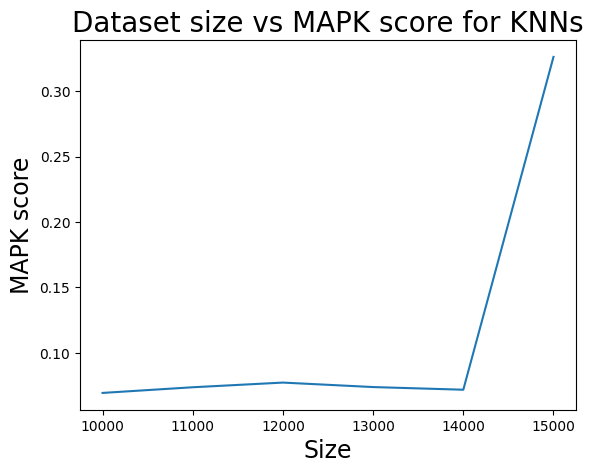

In [17]:
dataset_size = [10000, 11000, 12000, 13000, 14000, 15000]

plt.plot(dataset_size,mapk_scores)
plt.title("Dataset size vs MAPK score for KNNs",fontsize=20)
plt.xlabel("Size",fontsize=17)
plt.ylabel("MAPK score",fontsize=17)
plt.show()